<a href="https://colab.research.google.com/github/majbrittstenbog/hhh/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural language processing of newspaper articles on the first day of 16 days of activism
### Examining the sentiment of newspaper articles that mentions "16 days of activism" on gender-based violence.


*By Majbritt Lindholt Stenbøg*

---
*Notebook environment: Google Colab python version 3.8*


16 days of activism is a global event over 16 days that focuses on eliminating gender-based violence, and has been started by activists back in 1991. It is supported by global organizations such as UNWomen, and starts the 25th of november, *International Day for the Elimination of Violence Against Women* and ends the 10th of december, *International Human Rights Day*. During this period, organizations, politicians, and activists are creating awareness and debating gender-based violence prevention, which newspapers share and write about (UN Women, 2023). An important thing to be aware of when talking about topics such as violence or abuse, is how it is presented and talked about, because the sentiment of an article can affect how the reader interprets it. \
Newspaper articles can both share positive and action-inspiring articles, but also problem-oriented articles. Both articles are in their own way important, as problem-oriented information can help make aware that gender-based violence is actually a problem, and action-oriented articles can help inspire the reader to act on it. At the same time, it is interesting to look into how the sentiment of article headliners, which are supposed to draw the reader in, are, to further understand which focus characterizes the newspaper articles mentioning "16 days of activism" on the 25th of november, 2023. \
\
This report uses computational content analysis to examine and analyze the news paper titles. According to Neuendorf (2017, p. 2), content analysis can be defined as a "systematic, objective, quantitative analysis of message characteristics." In this case, I am using **Natural Language Processing** to analyze the sentiment content of these news paper titles.


In [11]:
# Download packages used for this assignment:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud
import seaborn as sns

First I am going to upload the dataset used for this assignment.\
Here I specify which dataset Python should find, in this case 2023_news in the file type xlsx, so I specify the name from what it is called in
google drive. Now df is the name of my data in python. So, later in the analysis, when I refer to df, it is 2023_news. I use df.head() to see the top of the dataset, so I can see how it looks. I specify the column names, column one is ID number, column two is the news paper titles marked as text, and column three is the manually labeled sentiment I've done.\
The dataset I am using is a 100 newspaper titles from the 25th of november, 2023, downloaded from retriever. The newspaper articles are from outlets around the world, but all the articles and titles are in english.

In [2]:
#!pip install gdown
!gdown https://drive.google.com/uc?id=1E03ZOinQCpnadejnkkFDo43tFyhPPYkO

fp = "2023_news.xlsx"
df = pd.read_excel(fp, header=None)

# Specifying the name of the headers for the two columns in my dataset.
df.columns = ['ID','text','sentiment']
df.head()

Downloading...
From: https://drive.google.com/uc?id=1E03ZOinQCpnadejnkkFDo43tFyhPPYkO
To: /content/2023_news.xlsx
100% 12.9k/12.9k [00:00<00:00, 6.38MB/s]


,ID,text,sentiment
0,1,US embassy partners with Pak women’s rights ac...,1
1,2,No excuse for not making labour and migration ...,0
2,3,International Day for the Elimination of Viole...,1
3,4,Cross River recorded 586 cases of gender-based...,0
4,5,"Exhibition titled ""Words from the Heart"" begin...",1


# Data cleaning and exploring the dataset

In order to clean my text data, i first need to figure out what is relevant to change in my data to do sentiment analyzis. \
Data cleaning for this dataset will include removing stopwords (such as 'by, of, the, as, an'), POS-tags (part-of-speech tags that categorizes whether a word is a person, organization, country and so on. But also groups whether it is a verb, adjective and so on), lemmatization (returning the words into their dictionary form) and.....\



In [3]:
# Load spaCy's English language model
!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

2023-12-13 18:34:54.661532: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 18:34:54.661621: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 18:34:54.661655: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 18:34:56.032558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


The following code frame are with the purpose of using the package SpaCy to clean the news title text rows by tokenizing, lemmatizing, removing stopwords and non-aplabetic tokens.\
The reason I do this is to prepare the text for analysis so it can be explored. \
The first part of the code is tokenizing and lemmatizing the text into lower-case letters and a base form (lemma) of the original word. for example 'Women's' becomes 'woman'. Further, stop words are found and removed. Stop words are common words that bind the sentence together, but don't have a meaning to the sentence, such as 'and, or, if'. In the following cleaned data I can see that spacy also recognizes 'US' and 'against' as a stop word, and removes it, which is not ideal as US is an indication of the country USA and not a common word. The last part is removing numbers and signs.

In [9]:
def spacy_clean_text(doc):
    # Tokenize, lemmatize, remove stop words and non-alphabetic tokens
    tokens = [token.lemma_.lower() for token in doc if not (token.is_stop and token.lemma_.lower() != 'us') and token.is_alpha]
    return ' '.join(tokens)

# Loading dataframe as 'data'
data = df

# Using spacy to preprocess the text column and creating a new column named 'cleaned_text'
data['cleaned_text'] = data['text'].apply(lambda x: spacy_clean_text(nlp(x)))

data.head()

,ID,text,sentiment,cleaned_text
0,1,US embassy partners with Pak women’s rights ac...,1,us embassy partner pak woman right activist
1,2,No excuse for not making labour and migration ...,0,excuse make labour migration safe fair woman
2,3,International Day for the Elimination of Viole...,1,international day elimination violence women a...
3,4,Cross River recorded 586 cases of gender-based...,0,cross river record case gender base violence m...
4,5,"Exhibition titled ""Words from the Heart"" begin...",1,exhibition title word heart begin dhaka


In [12]:
# Create a frequency table
word_freq = data['cleaned_text'].str.split(expand=True).stack().value_counts()

# Convert my word frequency table into a dataframe
word_freq_df = word_freq.to_frame().reset_index()
word_freq_df.columns = ['term','freq']
word_freq_df.head()

,term,freq
0,violence,48
1,day,34
2,woman,32
3,international,19
4,gender,19


After cleaning the text I can plot a word frequency table, as shown above. The most frequent word is 'violence', which is not surprising, as the main focus of 16 days of activism is to end gender-based violence. To better visualize this, I can plot the 10 most frequent words.

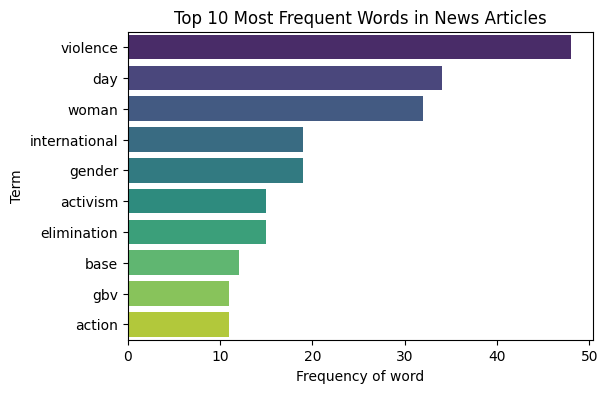

In [14]:
# Plotting the top N words
top_n = 10  # You can change this number to display more or fewer words
plt.figure(figsize=(6, 4))
sns.barplot(x='freq', y='term', data=word_freq_df.head(top_n), palette='viridis')

plt.title(f'Top {top_n} Most Frequent Words in News Articles')
plt.xlabel('Frequency of word')
plt.ylabel('Term')

plt.show()

The plot of word frequencies indicate again that violence is the most frequent word. Interestingly, woman is also high on the list, which indicates that the news articles more often refer to 'violence against women' than 'gender-based (term: gender and base) violence' or 'gbv' (Gender-Based Violence). \
Further, I can create a wordcloud to both see the frequency of the used words and the less used words.

In [15]:
# Download necessary NLTK data for my wordcloud
import nltk
nltk.download('popular')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

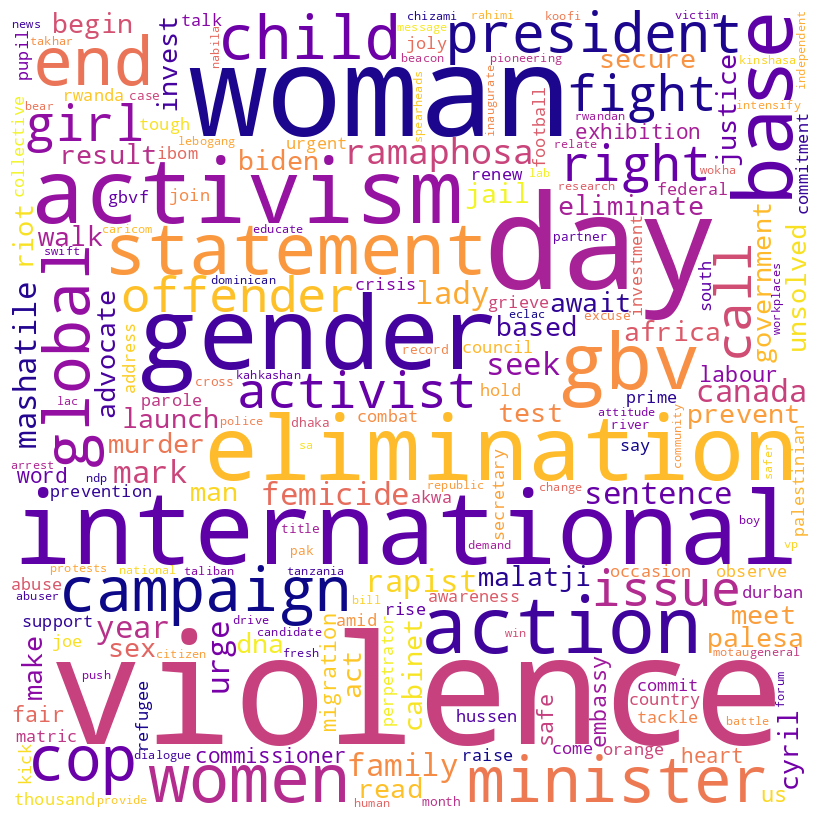

In [20]:
# Creating a wordcloud
wordcloud = WordCloud(collocations=False,
                      colormap='plasma',
                      width=800, height = 800,
                      background_color = 'white',
                      stopwords = stopwords.words('english'),
                      min_font_size = 10).generate(" ".join(df['cleaned_text']))

# plot it
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# References:
Neuendorf, K. (2017). Defining content analysis. In The Content Analysis Guidebook ( Second ed., pp. 1-35). SAGE Publications, Inc, https://doi.org/10.4135/9781071802878 \


UN Women (2023, December 8th). *16 Days of Activism against Gender-Based Violence*. https://www.unwomen.org/en/what-we-do/ending-violence-against-women/unite/16-days-of-activism